In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

train = pd.read_csv('https://raw.githubusercontent.com/vanilladucky/Housing-Prediction/main/data/cleaned/cleaned_train.csv')
target = pd.read_csv('https://raw.githubusercontent.com/vanilladucky/Housing-Prediction/main/data/cleaned/cleaned_target.csv')

In [2]:
train.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
target.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
train.join(target)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,1,4,4,2,3,4,4,8,4,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,1,4,4,2,3,4,4,8,4,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,1,4,4,2,3,4,4,8,4,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,2,4,4,2,3,4,4,8,0,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,1,4,4,2,3,4,4,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,1,4,4,2,3,4,4,8,4,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,2,4,4,2,3,2,4,8,4,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,1,4,4,2,3,0,2,8,4,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,2,4,4,2,3,4,4,8,4,142125


# Train Test Split

In [5]:
from sklearn.model_selection import KFold

In [6]:
kf = KFold(n_splits=5, shuffle=True)

In [7]:
np_train = np.array(train)
np_target = np.array(target).reshape(1,-1)
print(np_train.shape)
print(np_target.shape)

(1460, 79)
(1, 1460)


### Below code for cross validation to be used within the model

In [8]:
for train_index , test_index in kf.split(train):
    X_train , X_test = train.iloc[train_index,:],train.iloc[test_index,:]
    y_train , y_test = target.iloc[train_index,:] , target.iloc[test_index,:]

# Simple Linear Regression Model

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
linear_regression = LinearRegression()

acc_score = []
# Cross Validation
for train_index , test_index in kf.split(train):
    X_train , X_test = train.iloc[train_index,:],train.iloc[test_index,:]
    y_train , y_test = target.iloc[train_index,:] , target.iloc[test_index,:]
     
    linear_regression.fit(X_train,y_train)
    pred_values = linear_regression.predict(X_test)
     
    acc = mean_squared_error(pred_values , y_test, squared=False)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/5
 
print('error of each fold -> {}'.format(acc_score))
print('Avg error : {}'.format(avg_acc_score))

error of each fold -> [34151.938760528064, 46451.54860636613, 51320.22220864116, 30968.183863439008, 40346.456686016914]
Avg error : 40647.67002499825


# Decision Trees for Regression

In [10]:
from sklearn import tree
decision_tree = tree.DecisionTreeRegressor()

acc_score = []
# Cross Validation
for train_index , test_index in kf.split(train):
    X_train , X_test = train.iloc[train_index,:],train.iloc[test_index,:]
    y_train , y_test = target.iloc[train_index,:] , target.iloc[test_index,:]
     
    decision_tree.fit(X_train,y_train)
    pred_values = decision_tree.predict(X_test)
     
    acc = mean_squared_error(pred_values , y_test, squared=False)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/5
 
print('error of each fold -> {}'.format(acc_score))
print('Avg error : {}'.format(avg_acc_score))

error of each fold -> [48734.156923747985, 42575.703054909885, 33311.136859205806, 39508.508095404686, 39250.46731346447]
Avg error : 40675.99444934657


# Random Forest for Regression

In [11]:
from sklearn.ensemble import RandomForestRegressor
rfg = RandomForestRegressor(n_estimators = 500, max_depth=10, n_jobs=-1)

acc_score = []
# Cross Validation
for train_index , test_index in kf.split(train):
    X_train , X_test = train.iloc[train_index,:],train.iloc[test_index,:]
    y_train , y_test = target.iloc[train_index,:] , target.iloc[test_index,:]
     
    rfg.fit(X_train,y_train)
    pred_values = rfg.predict(X_test)
     
    acc = mean_squared_error(pred_values , y_test, squared=False)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/5
 
print('error of each fold -> {}'.format(acc_score))
print('Avg error: {}'.format(avg_acc_score))

error of each fold -> [32755.195494506104, 26554.531286095054, 29161.85950386168, 24859.583420906365, 32600.071728619077]
Avg error: 29186.248286797654


# XGBoost

In [12]:
import xgboost as xgb
xgboost = xgb.XGBRegressor(n_jobs=-1, n_estimators = 200)

acc_score = []
# Cross Validation
for train_index , test_index in kf.split(train):
    X_train , X_test = train.iloc[train_index,:],train.iloc[test_index,:]
    y_train , y_test = target.iloc[train_index,:] , target.iloc[test_index,:]
     
    xgboost.fit(X_train,y_train)
    pred_values = xgboost.predict(X_test)
     
    acc = mean_squared_error(pred_values , y_test, squared=False)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/5
 
print('error of each fold -> {}'.format(acc_score))
print('Avg error : {}'.format(avg_acc_score))

error of each fold -> [25062.57655746836, 32747.244227322433, 28527.864830674953, 24986.762923552345, 34689.88026931846]
Avg error : 29202.865761667308


# Now that we have observed Random Forest and XGBoost to yield the lowest error, we would now use these models and perform hyperparameter tuning

## First, Random Forest

In [13]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [14]:
rfg = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rfg, 
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               cv = 5, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1)
# Fit the random search model
rf_random.fit(train, target)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [15]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

### Now that we have a certain range, we would go in-depth by using Grid Search with Cross Validation

In [16]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [2,4,6],
    'n_estimators': [300,350,400,450]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rfg, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 5)

grid_search.fit(train, target)

grid_search.best_params_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


{'bootstrap': False,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

### Let us check the error rate with these hyperparameters

In [17]:
tuned_rfg = RandomForestRegressor(n_estimators = 400, 
                                  max_depth=None, 
                                  bootstrap = False,
                                  max_features='sqrt',
                                  min_samples_leaf = 1,
                                  min_samples_split = 2,
                                  n_jobs=-1, )

acc_score = []
# Cross Validation
for train_index , test_index in kf.split(train):
    X_train , X_test = train.iloc[train_index,:],train.iloc[test_index,:]
    y_train , y_test = target.iloc[train_index,:] , target.iloc[test_index,:]
     
    rfg.fit(X_train,y_train)
    pred_values = rfg.predict(X_test)
     
    acc = mean_squared_error(pred_values , y_test, squared=False)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/5
 
print('error of each fold -> {}'.format(acc_score))
print('Avg error: {}'.format(avg_acc_score))

error of each fold -> [24565.51985324077, 29888.8743057866, 30188.85646627657, 28676.913458268842, 27455.486971817772]
Avg error: 28155.130211078114


### As we can see, there is a very small reduction in the error rate

## Now, let's see XGBoost

In [18]:
max_depth = [2, 3, 4, 5, 6, 7, 8, 9]
eta = [0.1, 0.3, 0.5, 0.7, 0.9]
gamma = [0, 1, 2, 3, 4, 5]
min_child_weight = [0, 1, 2, 3, 4, 5]
subsample = [0.1, 0.3, 0.5, 0.7, 0.9]
# Create the random grid
random_grid = {'max_depth': max_depth,
               'eta': eta,
               'gamma': gamma,
               'min_child_weight': min_child_weight,
               'subsample': subsample,
              }
print(random_grid)

{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9], 'eta': [0.1, 0.3, 0.5, 0.7, 0.9], 'gamma': [0, 1, 2, 3, 4, 5], 'min_child_weight': [0, 1, 2, 3, 4, 5], 'subsample': [0.1, 0.3, 0.5, 0.7, 0.9]}


In [19]:
xgboost = xgb.XGBRegressor(tree_method = 'gpu_hist')
xgboost_random = RandomizedSearchCV(estimator = xgboost, 
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               cv = 5, 
                               verbose=3, 
                               random_state=42, 
                               n_jobs = -1)
# Fit the random search model
xgboost_random.fit(train, target)

xgboost_random.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'subsample': 0.7,
 'min_child_weight': 2,
 'max_depth': 4,
 'gamma': 4,
 'eta': 0.1}

In [20]:
param_grid = {
    'max_depth': [3, 4, 5],
    'eta': [0.05, 0.1, 0.15],
    'gamma': [4, 5, 6, 3],
    'min_child_weight': [1.5, 2, 2.5],
    'subsample': [0.6, 0.65, 0.7, 0.75, 0.8],
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = xgboost, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 5)

grid_search.fit(train, target)

grid_search.best_params_

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


{'eta': 0.1,
 'gamma': 4,
 'max_depth': 4,
 'min_child_weight': 2.5,
 'subsample': 0.75}

### Let us check the error rate with these hyperparameters

In [21]:
xgboost = xgb.XGBRegressor(n_jobs=-1, 
                            eta = 0.1, 
                            gamma = 4, 
                            max_depth = 4,
                            min_child_weight = 2.5, 
                            subsample=0.75)

acc_score = []
# Cross Validation
for train_index , test_index in kf.split(train):
    X_train , X_test = train.iloc[train_index,:],train.iloc[test_index,:]
    y_train , y_test = target.iloc[train_index,:] , target.iloc[test_index,:]
     
    xgboost.fit(X_train,y_train)
    pred_values = xgboost.predict(X_test)
     
    acc = mean_squared_error(pred_values , y_test, squared=False)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/5
 
print('error of each fold -> {}'.format(acc_score))
print('Avg error : {}'.format(avg_acc_score))

error of each fold -> [27284.856471873674, 30354.858463046585, 23379.533937224962, 22750.13687459666, 33001.679101911104]
Avg error : 27354.212969730597


### We observe that XGBoost also experienced a reducition in error which is great news

# Let us now create a stacked model

In [22]:
def get_models():
    models = dict()
    models['rf'] = RandomForestRegressor(n_estimators = 400, 
                                  max_depth=None, 
                                  bootstrap = False,
                                  max_features='sqrt',
                                  min_samples_leaf = 1,
                                  min_samples_split = 2,
                                  n_jobs=-1, )
    models['xgb'] = xgb.XGBRegressor(n_jobs=-1, 
                            eta = 0.1, 
                            gamma = 4, 
                            max_depth = 4,
                            min_child_weight = 2.5, 
                            subsample=0.75)
    return models

In [23]:
def evaluate_model(model, X, y):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
    return scores

In [24]:
from sklearn.ensemble import StackingRegressor
# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('rf', RandomForestRegressor(n_estimators = 400, 
                                  max_depth=None, 
                                  bootstrap = False,
                                  max_features='sqrt',
                                  min_samples_leaf = 1,
                                  min_samples_split = 2,
                                  n_jobs=-1)))
    level0.append(('xgb', xgb.XGBRegressor(n_jobs=-1, 
                            eta = 0.1, 
                            gamma = 4, 
                            max_depth = 4,
                            min_child_weight = 2.5, 
                            subsample=0.75)))
    # define meta learner model
    level1 = LinearRegression()
    # define the stacking ensemble
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model

def get_models():
    models = dict()
    models['rf'] = RandomForestRegressor(n_estimators = 400, 
                                  max_depth=None, 
                                  bootstrap = False,
                                  max_features='sqrt',
                                  min_samples_leaf = 1,
                                  min_samples_split = 2,
                                  n_jobs=-1, )
    models['xgb'] = xgb.XGBRegressor(n_jobs=-1, 
                            eta = 0.1, 
                            gamma = 4, 
                            max_depth = 4,
                            min_child_weight = 2.5, 
                            subsample=0.75)
    models['stacking'] = get_stacking()
    return models

>rf -776488851.604 (284898216.839)
>xgb -731955065.145 (351753686.982)
>stacking -687174990.825 (321993152.961)


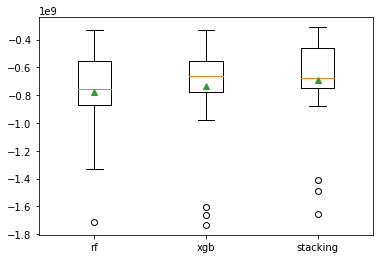

In [25]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, train, target)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

### Let's see our error value for our stacked model

In [26]:
# define the base models
level0 = list()
level0.append(('rf', RandomForestRegressor(n_estimators = 400, 
                                  max_depth=None, 
                                  bootstrap = False,
                                  max_features='sqrt',
                                  min_samples_leaf = 1,
                                  min_samples_split = 2,
                                  n_jobs=-1)))
level0.append(('xgb', xgb.XGBRegressor(n_jobs=-1, 
                            eta = 0.1, 
                            gamma = 4, 
                            max_depth = 4,
                            min_child_weight = 2.5, 
                            subsample=0.75)))
# define meta learner model
level1 = LinearRegression()
# define the stacking ensemble
stacked_model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)

acc_score = []
# Cross Validation
for train_index , test_index in kf.split(train):
    X_train , X_test = train.iloc[train_index,:],train.iloc[test_index,:]
    y_train , y_test = target.iloc[train_index,:] , target.iloc[test_index,:]
     
    stacked_model.fit(X_train,y_train)
    pred_values = stacked_model.predict(X_test)
     
    acc = mean_squared_error(pred_values , y_test, squared=False)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/5
 
print('error of each fold -> {}'.format(acc_score))
print('Avg error: {}'.format(avg_acc_score))

error of each fold -> [22841.418906009072, 24937.62300218031, 21910.20576023874, 20922.633818493832, 33771.22200141746]
Avg error: 24876.62069766788


## Althought it doesn't seem much different from XGBoost's tuned model, we would proceed to use this model for this project

In [27]:
import pickle
# save the model
filename = 'finalized_model.sav'
pickle.dump(stacked_model, open(filename, 'wb'))